In [1]:
#以下用iris的資料及作為示範基本knn的model

import pandas as pd
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('C:/Users/micky/Desktop/碩士/資料探勘/iris.txt', header = None, names = names, engine = 'python')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


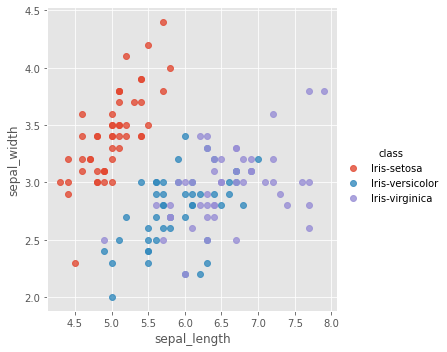

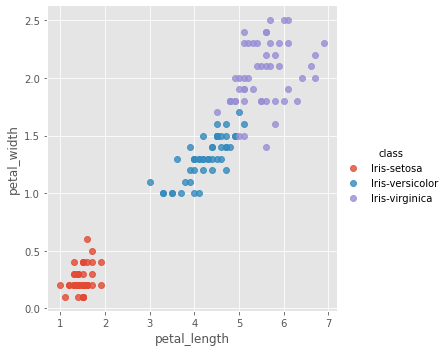

In [2]:
#先對資料做基本的EDA
import matplotlib.pyplot as plt    
import seaborn as sns
plt.style.use('ggplot')
sns.lmplot('sepal_length','sepal_width', data = df, fit_reg = False, hue = 'class') #fit_reg設定是否需要回歸直線
sns.lmplot('petal_length','petal_width', data = df, fit_reg = False, hue = 'class')

In [3]:
#最基本的將資料套用knn的模型
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

y = df['class'].values
X = df.drop('class', axis = 1).values

knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X, y)

y_pred = knn.predict(X)

print("Prediction: {}".format(y_pred))


Prediction: ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iri

In [4]:
#將knn模型將入資料分割的概念，使模型更加準確
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

train_sco = knn.score(X_train, y_train)
test_sco = knn.score(X_test, y_test)

print('Train/Test Accuracy:',train_sco,test_sco)




Train/Test Accuracy: 0.95 1.0


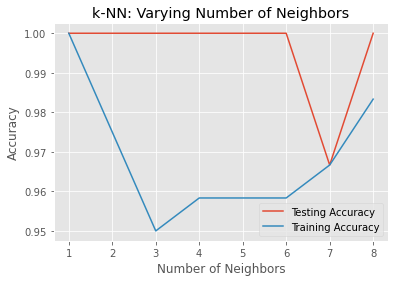

In [5]:
#畫圖觀察n_neighbors的值與overfitting和underfitting
import matplotlib.pyplot as plt

#先建立陣列來儲存訓練和測試資料分數
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

#用迴圈來觀察k，將結果儲存在陣列中
for i, k in enumerate(neighbors):
    
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    #計算訓練和測試資料精準度
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

#繪圖
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()